<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
from keras import datasets, layers, models, utils
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

Using TensorFlow backend.


In [2]:
print('train_images', type(train_images), train_images.shape, train_images.dtype)
print('train_labels', type(train_labels), train_labels.shape, train_labels.dtype)
print('test_images', type(test_images), test_images.shape, test_images.dtype)
print('test_labels', type(test_labels), test_labels.shape, test_labels.dtype)

train_images <class 'numpy.ndarray'> (60000, 28, 28) uint8
train_labels <class 'numpy.ndarray'> (60000,) uint8
test_images <class 'numpy.ndarray'> (10000, 28, 28) uint8
test_labels <class 'numpy.ndarray'> (10000,) uint8


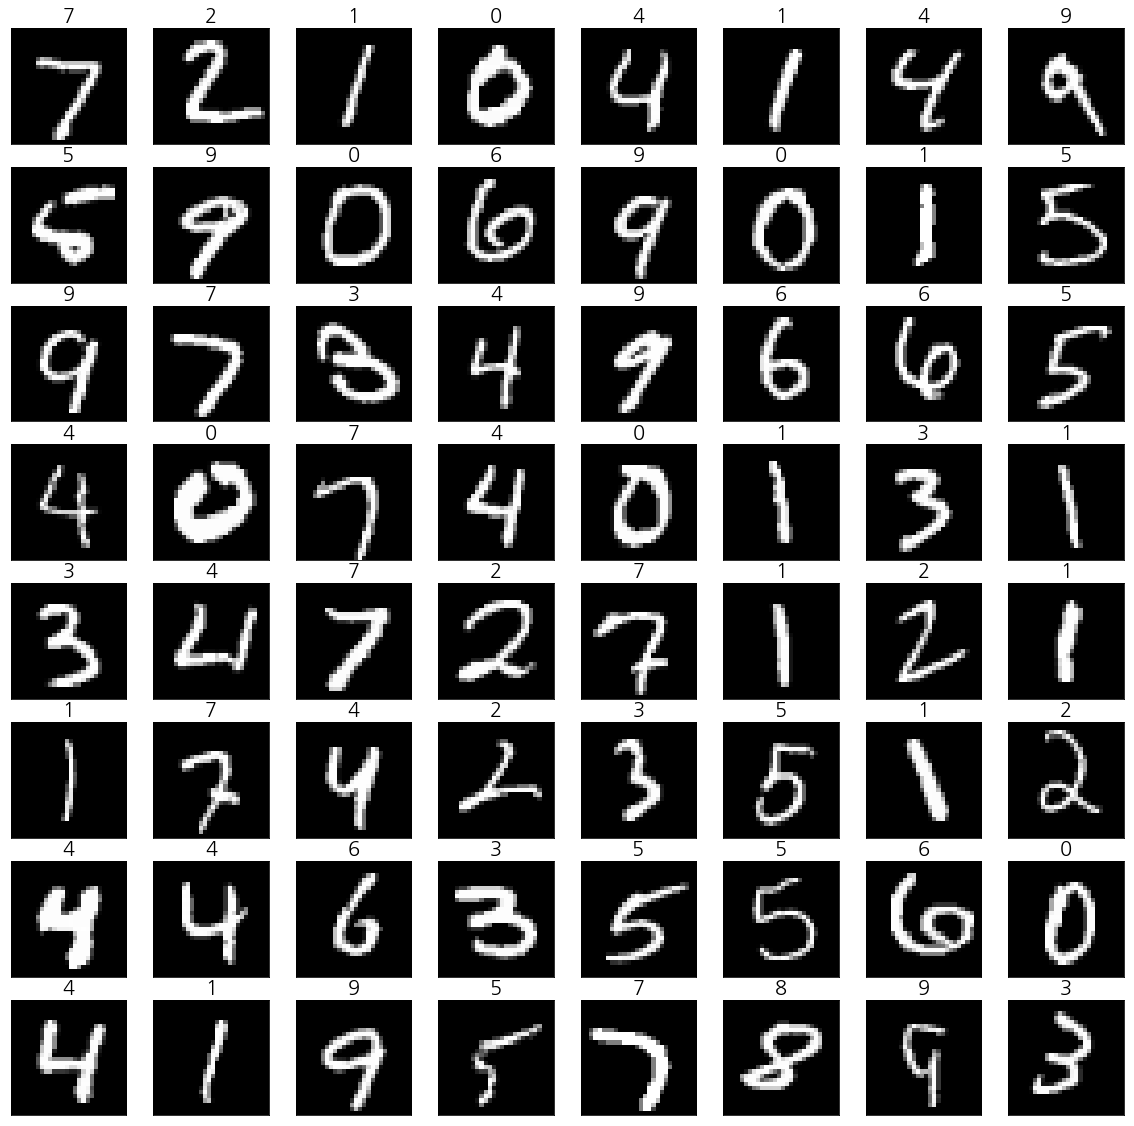

In [3]:
plt.figure(figsize=(20,20))
for i in range(0, 8*8):
    plt.subplot(8,8,i+1)   # subplot index는 1부터 시작함
    plt.xticks([])
    plt.yticks([])
    plt.title("{}".format(test_labels[i]), {'fontsize': 20})
    plt.imshow(test_images[i], cmap='gray')

In [4]:
_, h, w = train_images.shape
train_x = (train_images.reshape(-1, h*w) / 255).astype('float32')
test_x = (test_images.reshape(-1, h*w) / 255).astype(np.float32)
print('train_x:', type(train_x), train_x.shape, train_x.dtype)
print('test_x:', type(test_x), test_x.shape, test_x.dtype)

train_x: <class 'numpy.ndarray'> (60000, 784) float32
test_x: <class 'numpy.ndarray'> (10000, 784) float32


In [5]:
num_classes = 10
print('test_labels:', test_labels.shape, test_labels.dtype)
print('test_labels[0]=', test_labels[0])

train_y = utils.to_categorical(train_labels, num_classes)
test_y = utils.to_categorical(test_labels, num_classes)
print('test_y:', test_y.shape, test_y.dtype)
print('test_y[0]', test_y[0])

test_labels: (10000,) uint8
test_labels[0]= 7
test_y: (10000, 10) float32
test_y[0] [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [7]:
model = models.Sequential()
model.add(layers.Dense(100, activation='relu', input_shape=(h*w,)))
model.add(layers.Dense(num_classes, activation='softmax'))
model.summary()

model.compile('sgd', 'mse')
hist = model.fit(train_x, train_y, batch_size=100, epochs=100, verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.0896
Epoch 2/100
60000/60000 [==============================] - 1s 14us/step - loss: 0.0866
Epoch 3/100
60000/60000 [==============================] - 1s 14us/step - loss: 0.0834
Epoch 4/100
60000/60000 [==============================] - 1s 15us/step - loss: 0.0797
Epoch 5/100
60000/60000 [==============================] - 1s 15us/step - loss: 0.0757
Epoch 6/100
60000/60000 [==========================

60000/60000 [==============================] - 1s 14us/step - loss: 0.0157
Epoch 84/100
60000/60000 [==============================] - 1s 13us/step - loss: 0.0156
Epoch 85/100
60000/60000 [==============================] - 1s 13us/step - loss: 0.0156
Epoch 86/100
60000/60000 [==============================] - 1s 14us/step - loss: 0.0155
Epoch 87/100
60000/60000 [==============================] - 1s 15us/step - loss: 0.0154
Epoch 88/100
60000/60000 [==============================] - 1s 14us/step - loss: 0.0154
Epoch 89/100
60000/60000 [==============================] - 1s 14us/step - loss: 0.0153
Epoch 90/100
60000/60000 [==============================] - 1s 14us/step - loss: 0.0153
Epoch 91/100
60000/60000 [==============================] - 1s 14us/step - loss: 0.0152
Epoch 92/100
60000/60000 [==============================] - 1s 14us/step - loss: 0.0152
Epoch 93/100
60000/60000 [==============================] - 1s 14us/step - loss: 0.0151
Epoch 94/100
60000/60000 [===================

- $softmax = \Large \frac {e^{x}}{\Sigma_{j=1}^{10} e^{x_j}}$

In [8]:
x = layers.Input((h*w,))
h = layers.Dense(100, activation='relu')(x)
y = layers.Dense(num_classes, activation='softmax')(h)
model = models.Model(x, y)
model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy',
             metrics=['accuracy'])
hist = model.fit(train_x, train_y, batch_size=128, epochs=15, validation_split=0.2, verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 1s 22us/step - loss: 0.4206 - acc: 0.8851 - val_loss: 0.2273 - val_acc: 0.9364
Epoch 2/15
48000/48000 [==============================] - 1s 20us/step - loss: 0.1968 - acc: 0.9441 - val_loss: 0.1656 - val_acc: 0.9530
Epoch 3/15
48000/48000 [==============================] - 1s 18us/step - loss:

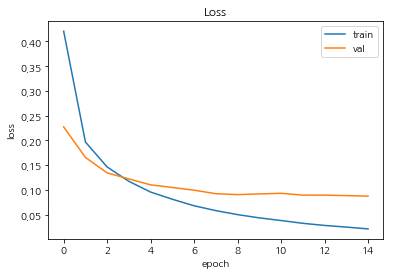

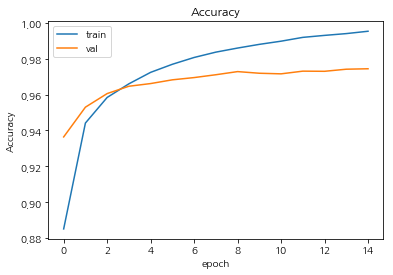

In [9]:
plt.title('Loss')
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc=0)
plt.show()

plt.title('Accuracy')
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc=0)
plt.show()

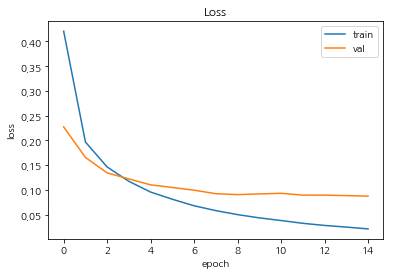

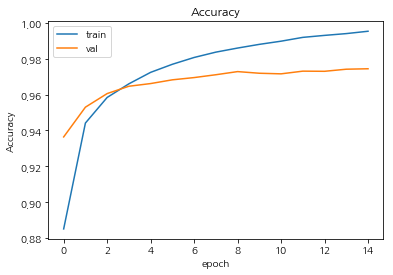

In [10]:
from modules.plot_history import plot_loss, plot_acc

plot_loss(hist.history, 'Loss')
plt.show()
plot_acc(hist, 'Accuracy')
plt.show()

In [11]:
evluation = model.evaluate(test_x, test_y, batch_size=128 )
print('[loss, accuracy]:', evluation)

10000/10000 [==============================] - 0s 7us/step
[loss, accuracy]: [0.0808403797746636, 0.9763]


In [13]:
y_pred = model.predict(test_x)
print('y_pred', y_pred.shape, y_pred.dtype)
print('y_pred[0]', y_pred[0])

#class_pred = model.predict_classes( test_x ) # only for sequential model
class_pred = np.argmax(y_pred, axis=1)
print('class_pred', class_pred.shape, class_pred.dtype)
print('class_pred[0]', class_pred[0])

y_pred (10000, 10) float32
y_pred[0] [2.5885369e-08 4.0002482e-10 7.0094319e-07 9.0436833e-06 8.5040248e-13
 1.7305901e-09 1.1626367e-13 9.9998987e-01 9.9839689e-08 2.7006584e-07]
class_pred (10000,) int64
class_pred[0] 7


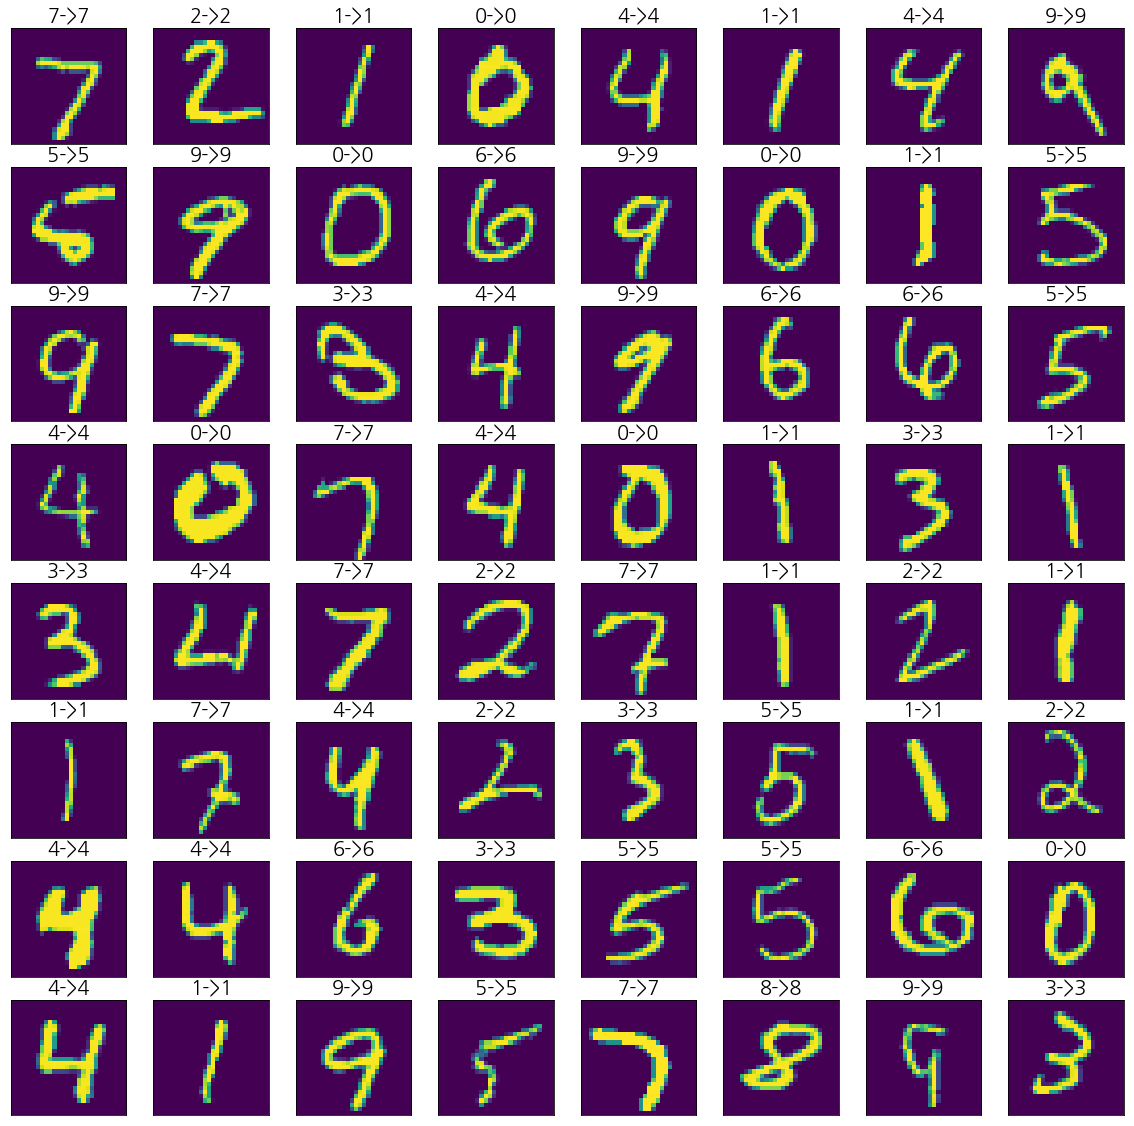

In [16]:
plt.figure(figsize=(20,20))
for i in range(0, 8*8):
    plt.subplot(8,8,i+1)   # subplot index는 1부터 시작함
    plt.xticks([])
    plt.yticks([])
    plt.title("{0}->{1}".format(test_labels[i], class_pred[i]), {'fontsize': 20})
    plt.imshow(test_images[i])